In [40]:
import pandas as pd

# Load the dataset
file_path = '/content/glass.xlsx'
glass_df = pd.read_excel(file_path, sheet_name='glass')
description_df = pd.read_excel(file_path, sheet_name='Description')
# Display the first few rows to check the structure
glass_df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [41]:
print(glass_df.columns)


Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')


In [42]:
glass_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [43]:
print(glass_df.isnull().sum())

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64


In [44]:
print(glass_df.describe())

               RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.730000    0.000000    0.290000   69.810000    0.000000   
25%      1.516522   12.907500    2.115000    1.190000   72.280000    0.122500   
50%      1.517680   13.300000    3.480000    1.360000   72.790000    0.555000   
75%      1.519157   13.825000    3.600000    1.630000   73.087500    0.610000   
max      1.533930   17.380000    4.490000    3.500000   75.410000    6.210000   

               Ca          Ba          Fe        Type  
count  214.000000  214.000000  214.000000  214.000000  
mean     8.956963    0.175047    0.057009    2.780374  
std      1.423153    0.497219    0.097439    2.103739  
min      5.430000    0.000000    0.000000    1

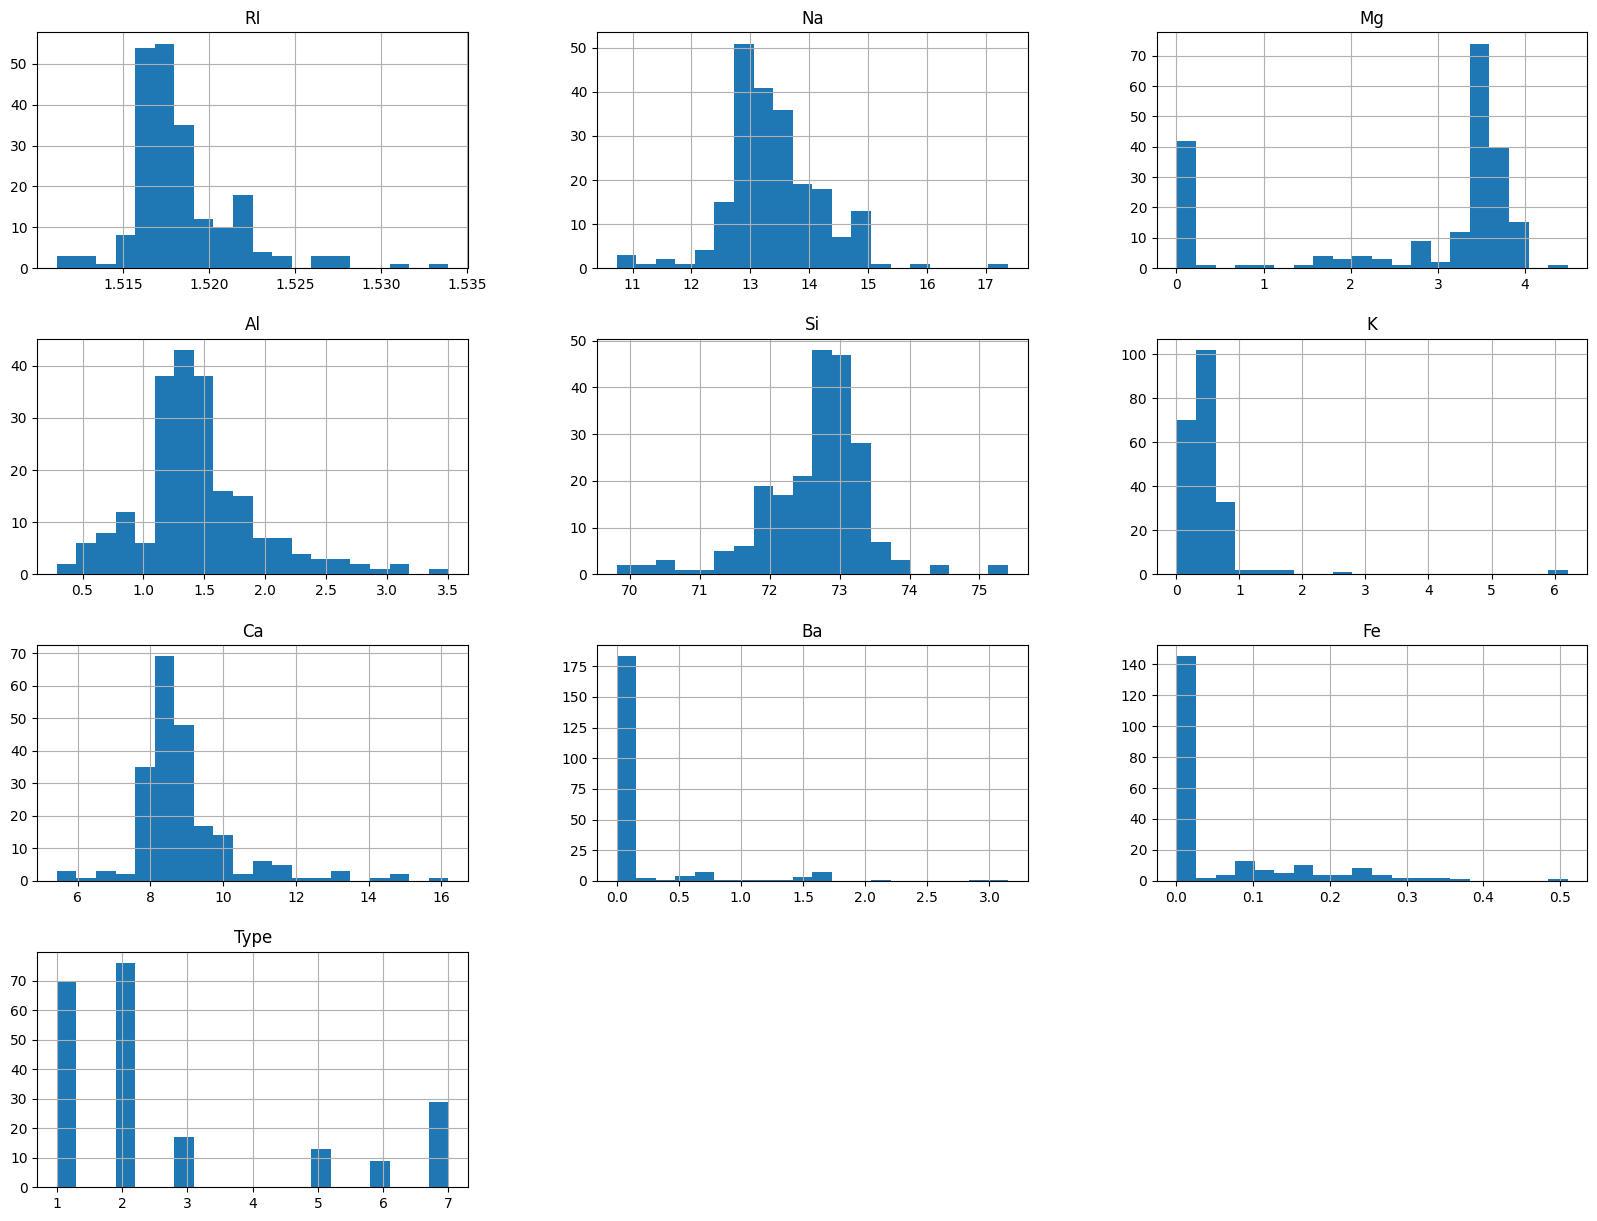

In [45]:
import matplotlib.pyplot as plt
glass_df.hist(bins=20, figsize=(20, 15))
plt.show()

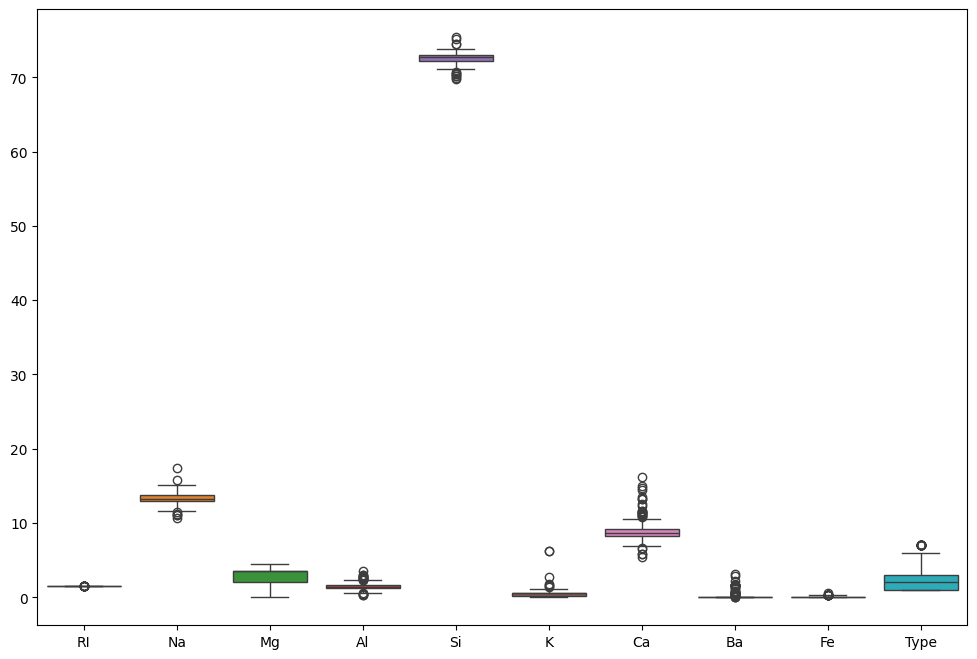

In [46]:
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.boxplot(data=glass_df)
plt.show()

In [47]:
glass_df.fillna(glass_df.median(), inplace=True)

In [48]:
from sklearn.preprocessing import StandardScaler
X = glass_df.drop('Type', axis=1)
y = glass_df['Type']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [49]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
rf_clf = RandomForestClassifier(random_state=42)

In [51]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [52]:
y_pred = rf_clf.predict(X_test)

In [53]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8372093023255814

Classification Report:
               precision    recall  f1-score   support

           1       0.69      1.00      0.81        11
           2       0.90      0.64      0.75        14
           3       1.00      0.67      0.80         3
           5       1.00      0.75      0.86         4
           6       1.00      1.00      1.00         3
           7       0.89      1.00      0.94         8

    accuracy                           0.84        43
   macro avg       0.91      0.84      0.86        43
weighted avg       0.87      0.84      0.83        43


Confusion Matrix:
 [[11  0  0  0  0  0]
 [ 4  9  0  0  0  1]
 [ 1  0  2  0  0  0]
 [ 0  1  0  3  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0  8]]


In [55]:
from sklearn.ensemble import AdaBoostClassifier

# Initialize the AdaBoost Classifier
ada_clf = AdaBoostClassifier(n_estimators=50, random_state=42)

# Train the model
ada_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_ada = ada_clf.predict(X_test)

# Evaluate the AdaBoost model
print("AdaBoost - Accuracy:", accuracy_score(y_test, y_pred_ada))
print("AdaBoost - Classification Report:\n", classification_report(y_test, y_pred_ada))


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost - Accuracy: 0.4883720930232558
AdaBoost - Classification Report:
               precision    recall  f1-score   support

           1       0.50      0.91      0.65        11
           2       0.35      0.43      0.39        14
           3       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         4
           6       0.75      1.00      0.86         3
           7       1.00      0.25      0.40         8

    accuracy                           0.49        43
   macro avg       0.43      0.43      0.38        43
weighted avg       0.48      0.49      0.43        43



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Additional Notes

Q.1) Bagging and Boosting Methods
Bagging (Bootstrap Aggregating):

Definition: Bagging is an ensemble learning technique that improves the stability and accuracy of machine learning algorithms. It reduces variance and helps to avoid overfitting.
How it Works:
Bootstrap Sampling: Bagging creates multiple subsets of the original dataset by sampling with replacement (bootstrap sampling). Each subset is used to train a different model.
Training: For each subset, a model is trained independently (e.g., decision trees).
Aggregation: The predictions from all models are aggregated (e.g., by voting for classification or averaging for regression).
Example Algorithm: Random Forest is a popular bagging algorithm that combines the predictions of multiple decision trees to produce a final result.
Boosting:

Definition: Boosting is an ensemble learning technique that aims to convert weak learners into strong learners. It reduces both bias and variance.
How it Works:
Sequential Training: Boosting trains models sequentially, where each new model is trained to correct the errors of the previous one. It focuses more on the misclassified instances.
Weight Adjustment: In each iteration, instances that were misclassified are given more weight, so the next model pays more attention to them.
Aggregation: The final prediction is a weighted sum of the predictions from all models.
Example Algorithms: AdaBoost, Gradient Boosting, and XGBoost are popular boosting algorithms.
Key Differences:

Training Process: Bagging trains models independently in parallel, while boosting trains models sequentially.
Focus on Errors: Bagging reduces variance by averaging multiple models, while boosting reduces bias by focusing on the errors of previous models.
Model Complexity: Bagging typically uses complex models (e.g., deep trees), whereas boosting often uses simple models (e.g., shallow trees).
Final Prediction: Bagging averages the predictions, while boosting combines them using weighted votes based on model performance.

Q.2) Handling Imbalance in the Data
Data imbalance occurs when one class has significantly more instances than another, which can lead to biased models that favor the majority class. Here are several strategies to handle imbalanced datasets:

1. Resampling Techniques:

Oversampling: Increase the number of instances in the minority class by duplicating samples or generating synthetic samples (e.g., using SMOTE—Synthetic Minority Over-sampling Technique).
Undersampling: Reduce the number of instances in the majority class by randomly removing samples.
2. Use of Different Evaluation Metrics:

Instead of accuracy, use metrics that better reflect the performance on imbalanced data, such as:
Precision: Proportion of true positive predictions among all positive predictions.
Recall (Sensitivity): Proportion of true positive predictions among all actual positives.
F1 Score: Harmonic mean of precision and recall, useful for imbalanced datasets.
ROC-AUC: Area under the Receiver Operating Characteristic curve, which considers both true positive and false positive rates.
3. Ensemble Techniques:

Use ensemble methods that focus on the minority class, such as:
Balanced Random Forest: A variation of Random Forest that undersamples the majority class in each bootstrap sample.
EasyEnsemble and BalanceCascade: Techniques that create balanced training sets through multiple sampling methods.
4. Algorithmic Adjustments:

Some algorithms allow you to set class weights. Increasing the weight of the minority class can help the model pay more attention to it during training.
5. Anomaly Detection Techniques:

In cases where the minority class is very rare, you can treat it as an anomaly detection problem and use techniques designed for that purpose.